# Program 1

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#importing data
datasets = pd.read_csv('Salary_Data.csv')
#taking experience as x
X = datasets.iloc[:, :-1].values
#taking salary as y
Y = datasets.iloc[:, 1].values
#splitting data into train and test datasets, such that test size is 1/3 of total data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33,random_state = 25)


regressor = LinearRegression()
#applying train data set to model
regressor.fit(X_train, y_train)
#predicting algo using test data
Y_Pred = regressor.predict(X_test)
#calcuating mean squared error 
print("Mean squared error: %.2f" % mean_squared_error(y_test, Y_Pred, squared = False))


Mean squared error: 5705.28


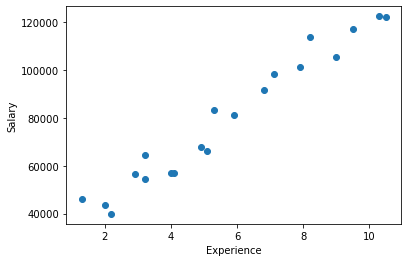

In [70]:
#plotting scatter graph for train dataset
plt.scatter(X_train, y_train)
#setting x column label
plt.xlabel("Experience")
#setting y column label
plt.ylabel("Salary")
plt.show()

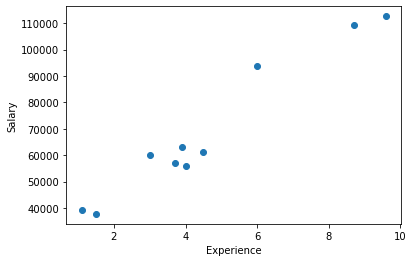

In [71]:
#plotting scatter graph for test dataset
plt.scatter(X_test, y_test)
#setting x column label
plt.xlabel("Experience")
#setting x column label
plt.ylabel("Salary")
plt.show()

# program 2

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")
#importing data
kdf = pd.read_csv('K-Mean_Dataset.csv')
#filling null values of dataset with mean values of data for each column
kdf= kdf.fillna(kdf.mean())
#splitting data such that 1-16 columns will be applied to x cordinate 
X = kdf.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
#splitting data such that TENURE will be applied to y cordinate 
Y = kdf.iloc[:, -1]
kdf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [73]:
#making sure no null values in dataset, incase of null values its throwing error
kdf.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [77]:
from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
#applying x data to kmean algorithm
km.fit(X)

KMeans(n_clusters=3)

In [78]:
y_cluster_kmeans = km.predict(X)
from sklearn import metrics
#calculating silhouette_score
score = metrics.silhouette_score(X, y_cluster_kmeans)
print(score)

0.4650447552840422


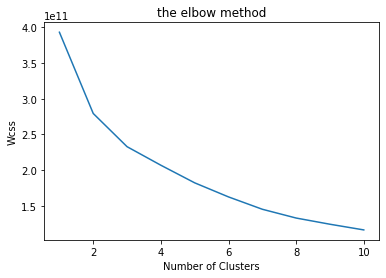

In [79]:
#elbow method to know the number of clusters
wcss = []
for i in range(1,11):
     kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

# program 3

In [65]:
#preproceing data before passing to kmean algorithm
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

In [69]:
#passing data to kmean algorithm
from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X_scaled)
#calculating silhouette_score
y_cluster_kmeans = km.predict(X_scaled)
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print(score)


0.2672161762428284
